
# 🚗 Metro Interstate Traffic Volume Analysis

This project analyzes traffic volume patterns using the [Metro Interstate Traffic Volume dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

We aim to explore how **traffic volume varies by time (hour, day, month)**, and other weather-related conditions.

**Goals:**
- Clean and understand the dataset.
- Visualize traffic trends by hour, weekday, and month.
- Identify peak traffic times and patterns.
- (Optional) Explore relationships between weather and traffic volume.


In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv.gz")
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:

print("Shape of the dataset:", df.shape)
df.info()


Shape of the dataset: (48204, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### 🔧 Handling Missing Values

In [8]:

# Fill missing weather values with 0 where applicable
df['rain_1h'] = df['rain_1h'].fillna(0)
df['snow_1h'] = df['snow_1h'].fillna(0)
df['clouds_all'] = df['clouds_all'].ffill()

# Fill holiday NaNs with 'None'
df['holiday'] = df['holiday'].fillna('No Holiday')

# Drop rows with missing traffic volume if any
df = df.dropna(subset=['traffic_volume'])

df.isnull().sum()


C:\Users\riya\AppData\Local\Temp\ipykernel_10592\3065452826.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['clouds_all'] = df['clouds_all'].fillna(method='ffill')


holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

### 🧠 Feature Engineering

In [9]:

df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['weekday'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month_name()
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,weekday,month
0,No Holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,Tuesday,October
1,No Holiday,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,Tuesday,October
2,No Holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,Tuesday,October
3,No Holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,Tuesday,October
4,No Holiday,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,Tuesday,October


### 📈 Average Traffic Volume by Hour

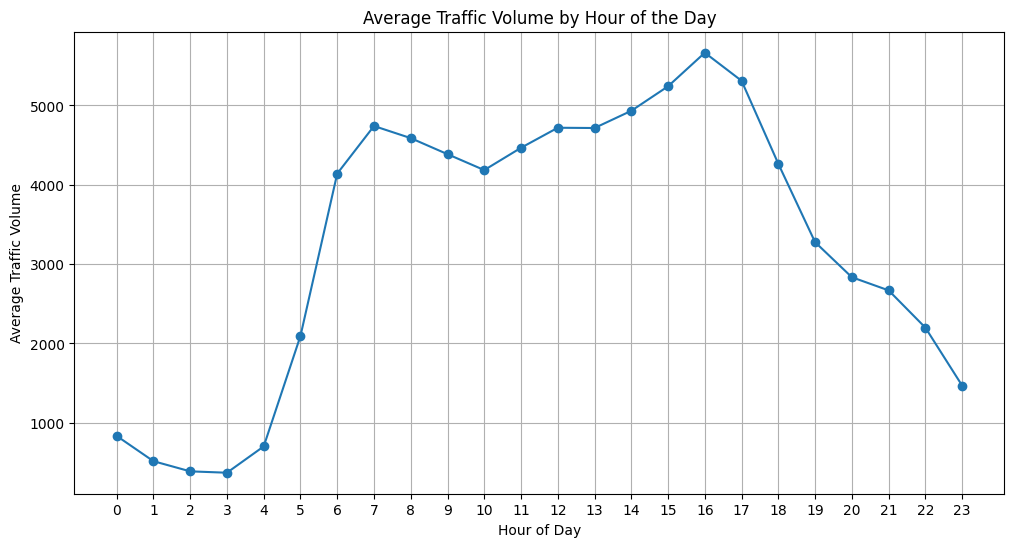

In [22]:
plt.figure(figsize=(12, 6))
df.groupby('hour')['traffic_volume'].mean().plot(kind='line', marker='o')
plt.title('Average Traffic Volume by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.grid(axis= 'both')
plt.xticks(range(0, 24))
plt.show()


### 📅 Average Traffic Volume by Day of the Week

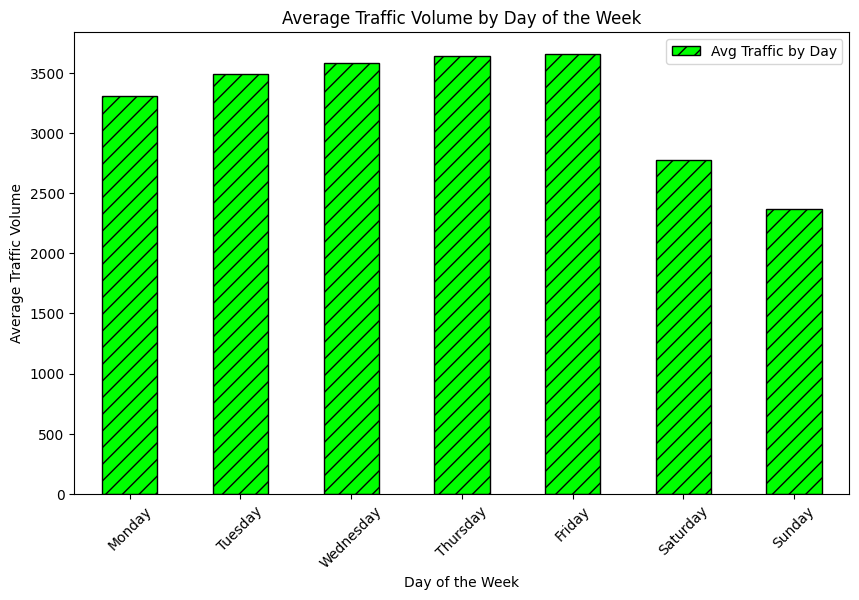

In [23]:

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day = df.groupby('weekday')['traffic_volume'].mean().reindex(weekday_order)

plt.figure(figsize=(10, 6))
avg_by_day.plot(kind='bar', color='lime', edgecolor='black', hatch='//')
plt.title('Average Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.legend(['Avg Traffic by Day'])
plt.show()


### 📆 Average Traffic Volume by Month

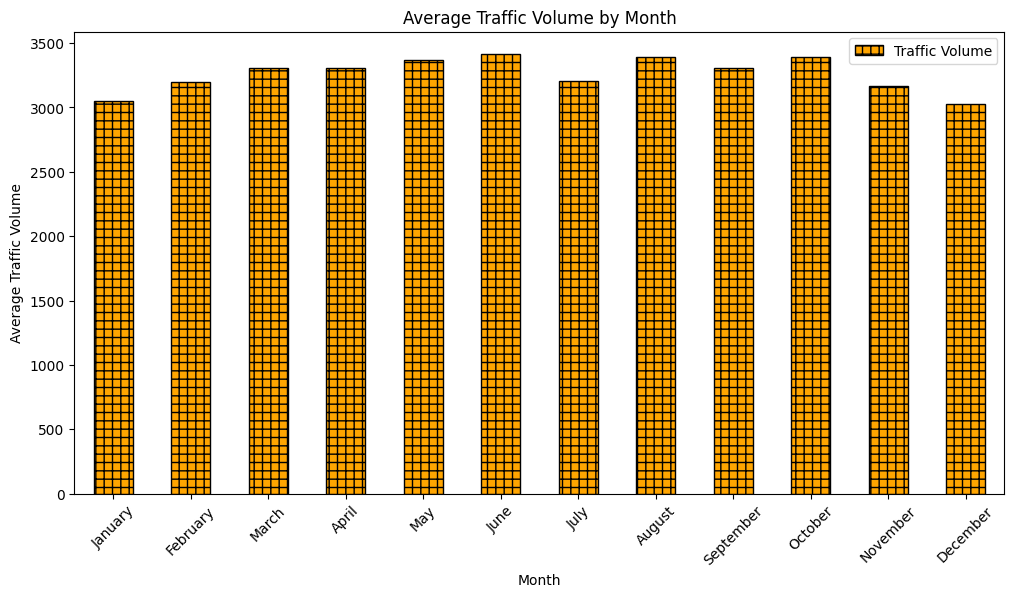

In [37]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
avg_by_month = df.groupby('month')['traffic_volume'].mean().reindex(month_order)

plt.figure(figsize=(12, 6))
avg_by_month.plot(kind='bar', color='orange', edgecolor='black', hatch = '++', label = 'Traffic Volume')
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### 🎉 Traffic Volume: Holiday vs Non-Holiday

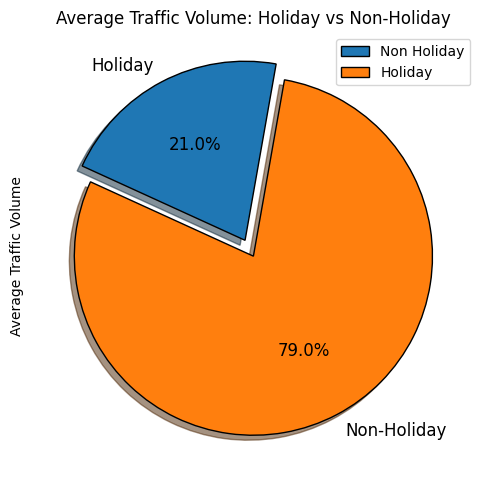

In [53]:

df['is_holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != 'No Holiday' else 'Non-Holiday')
avg_by_holiday = df.groupby('is_holiday')['traffic_volume'].mean()

plt.figure(figsize=(6, 5))
avg_by_holiday.plot(kind='pie', color=['red', 'green'], shadow = True, autopct = '%1.1f%%', startangle = 80, explode = (.1, 0),  radius = 1, wedgeprops = {'edgecolor': 'black'}, textprops = {'fontsize': 12})
plt.title('Average Traffic Volume: Holiday vs Non-Holiday')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=0)
plt.legend(['Non Holiday', 'Holiday'])
plt.tight_layout()
plt.show()


### 🌧️ Weather Impact on Traffic Volume

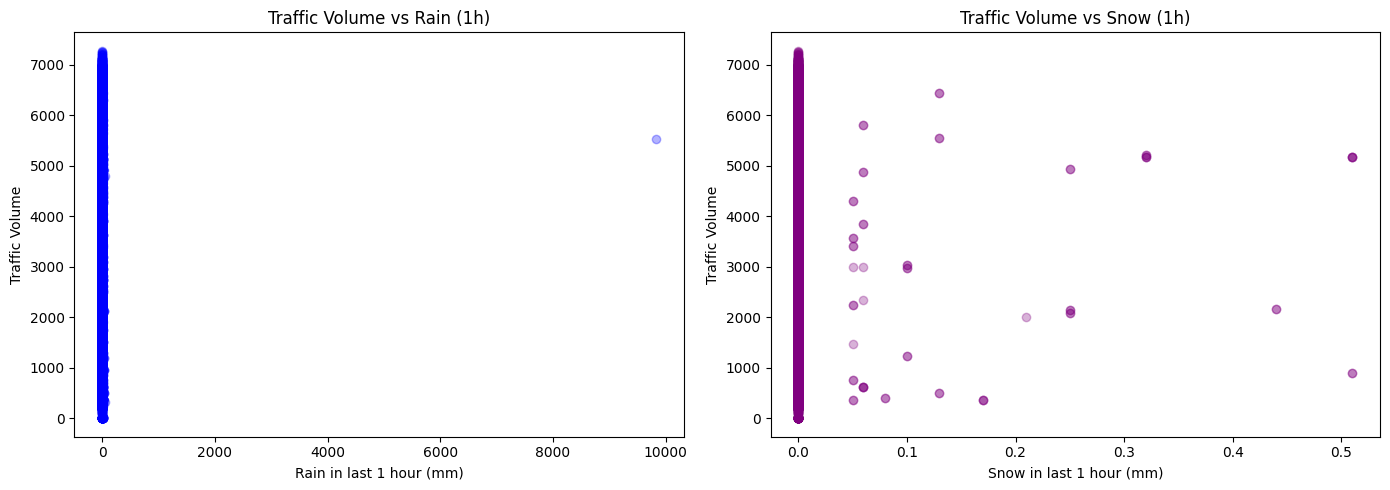

In [14]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df['rain_1h'], df['traffic_volume'], alpha=0.3, color='blue')
axes[0].set_title('Traffic Volume vs Rain (1h)')
axes[0].set_xlabel('Rain in last 1 hour (mm)')
axes[0].set_ylabel('Traffic Volume')

axes[1].scatter(df['snow_1h'], df['traffic_volume'], alpha=0.3, color='purple')
axes[1].set_title('Traffic Volume vs Snow (1h)')
axes[1].set_xlabel('Snow in last 1 hour (mm)')
axes[1].set_ylabel('Traffic Volume')

plt.tight_layout()
plt.show()


### 📊 Correlation Heatmap

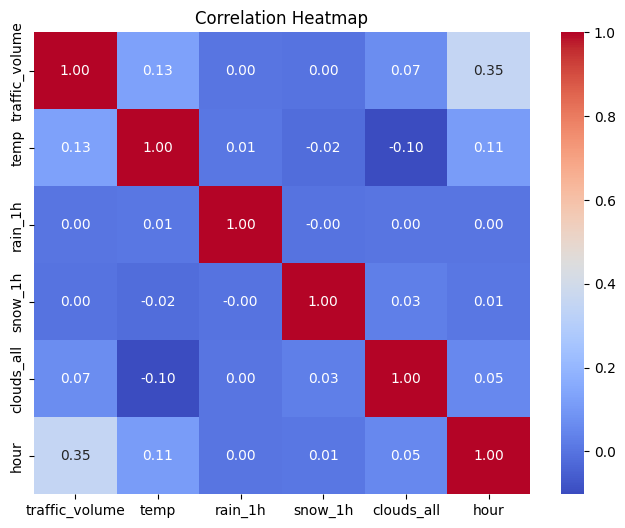

In [15]:

import seaborn as sns

numeric_df = df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### 🔥 Hourly Traffic Heatmap (Hour vs Weekday)

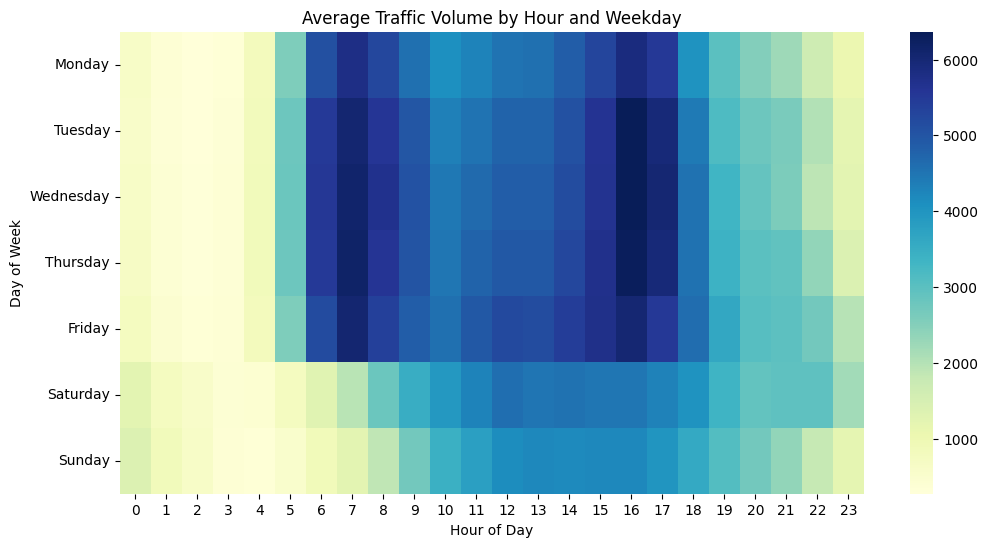

In [16]:

pivot_hour_day = df.pivot_table(index='weekday', columns='hour', values='traffic_volume', aggfunc='mean')
pivot_hour_day = pivot_hour_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_hour_day, cmap='YlGnBu')
plt.title('Average Traffic Volume by Hour and Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()



## ✅ Conclusion

- **Peak hours** occur during typical commuting times (7-9 AM and 4-6 PM).
- **Weekends** show significantly **lower traffic** than weekdays.
- **Fridays** tend to have the highest traffic among weekdays.
- Weather conditions like rain/snow were prepared for analysis — future steps could explore their impact.

---

This project demonstrates how time-based patterns can be revealed using simple EDA techniques in Pandas, Matplotlib, and Seaborn.
